# How good is your model ?

Anyone can build a machine learning (ML) model with a few lines of code, but building a good machine learning model is a whole other story.
What do I mean by a GOOD machine learning model?
It depends, but generally, you’ll evaluate your machine learning model based on some predetermined metrics that you decide to use. When it comes to building classification models, you’ll most likely use a confusion matrix and related metrics to evaluate your model. Confusion matrices are not just useful in model evaluation but also model monitoring and model management!
Don’t worry, we’re not talking about linear algebra matrices here!

## What is a Confusion Matrix?
A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.


Below is an image of the structure of a 2x2 confusion matrix. To give an example, let’s say that there were ten instances where a classification model predicted ‘Yes’ in which the actual value was ‘Yes’. Then the number ten would go in the top left corner in the True Positive quadrant. This leads us to some key terms:
<img src = "../media/conf.png">


- Positive (P): Observation is positive (eg. is a spam).
- Negative (N): Observation is not positive (eg. is not a spam).
- True Positive (TP): Outcome where the model correctly predicts the positive class.
- True Negative (TN): Outcome where the model correctly predicts the negative class.
- False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive  class when it is actually negative.
- False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.


### Accuracy
This is simply equal to the proportion of predictions that the model classified correctly.
<img src = "../media/acu.png">

### Precision
Precision is also known as positive predictive value and is the proportion of relevant instances among the retrieved instances. In other words, it answers the question “What proportion of positive identifications was actually correct?”
<img src = "../media/pre.png">

### Recall
Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. It answers the question “What proportion of actual positives was identified correctly?”
<img src ="../media/rec.png">

### Specificity
Specificity, also known as the true negative rate (TNR), measures the proportion of actual negatives that are correctly identified as such. It is the opposite of recall.
<img src = "../media/spe.png">

### F1 Score
The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of your model.
<img src = "../media/f1.png">


Source : https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

## Confusion Matrix in Scikit-learn

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# load the datasets "digits"
digits = datasets.load_digits()

# create feature and target arrays
X = digits.data
y = digits.target

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state =42)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [15]:
print(confusion_matrix(y_test,y_pred))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  1 80  1  0  0  1]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  4  0  0  0  0  0  0 61  0]
 [ 0  0  0  1  1  1  0  0  0 74]]


In [25]:
cm = confusion_matrix(y_test,y_pred)

We can produce a more understandable and visually readable confusion matrix using seaborn.

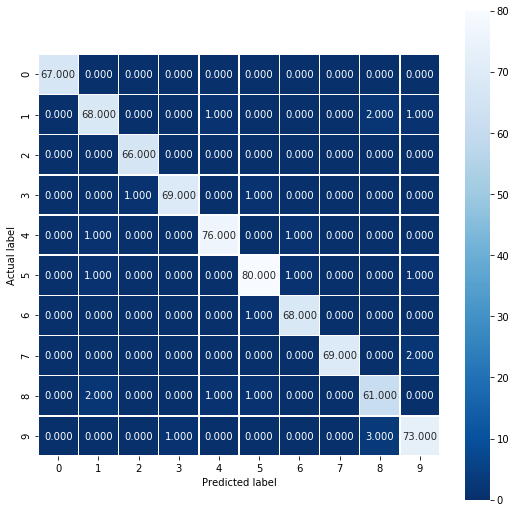

In [29]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.95      1.00      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99        71
           4       0.97      1.00      0.99        78
           5       0.99      0.96      0.98        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       0.98      0.94      0.96        65
           9       0.99      0.96      0.97        77

    accuracy                           0.98       719
   macro avg       0.99      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



# Logistic Regression ( as classification (NOT REGRESSION))

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
